# LOGISTIC REGRESSION
                  Logistic Regession is a statistical model that uses a logistic problem

- AUTHOR=KRISHNA
- DATA NAME=HEART DISEASE

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [142]:
df = pd.read_csv("../data/heart_disease.csv")
print(df.head)

<bound method NDFrame.head of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No               3   
1                No  20.34      No              No    Yes               0   
2                No  26.58     Yes              No     No              20   
3                No  24.21      No              No     No               0   
4                No  23.71      No              No     No              28   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No               7   
319791           No  29.84     Yes              No     No               0   
319792           No  24.24      No              No     No               0   
319793           No  32.81      No              No     No               0   
319794           No  46.56      No              No     No               0   

        MentalHealth DiffWalking     Sex  Age

In [143]:
df.shape

(319795, 18)

`there r 319795 rows and 18 columns`

In [144]:
df.isnull().sum()

HeartDisease        0
BMI                 2
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         1
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [145]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319793.000000,319795.00000,319795.000000,319795.000000
mean,28.325407,3.37171,3.898366,7.097075
std,6.356104,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [146]:
df.duplicated().sum()

18078

-There are 18078 Duplicated

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319793 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319794 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [148]:
names = ['krishna','chaitu']
for i in names:
     print(f"my name is {i}")

my name is krishna
my name is chaitu


In [149]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [150]:
df['HeartDisease'].value_counts()


HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

# Data Cleaning

-1 Handling Missing Values

In [151]:
print("null before dropping", df.isna().sum())

null before dropping HeartDisease        0
BMI                 2
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         1
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


#Heandling Duplicated Rows


In [152]:
print("before dropping duplicated row:",df.duplicated().sum())
df=df.drop_duplicates()
print("After dropping duplicated row:",df.duplicated().sum())

before dropping duplicated row: 18078
After dropping duplicated row: 0


# EXPLORATORY DATA ANALYSIS
- UNIVARENT ANALYSIS -GOAL : 

<Axes: xlabel='BMI', ylabel='Count'>

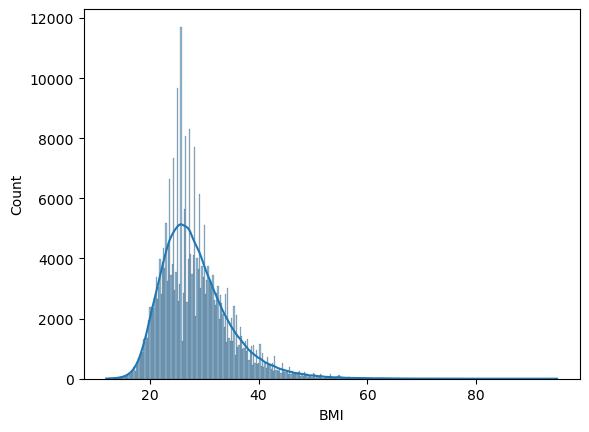

In [153]:
sns.histplot(df["BMI"],kde=True)

KidneyDisease
No     289941
Yes     11776
Name: count, dtype: int64

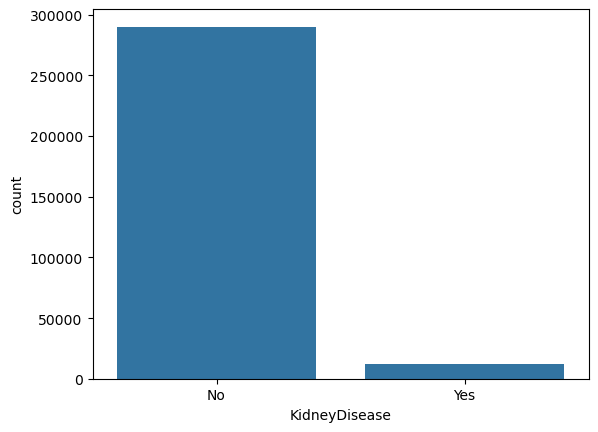

In [154]:
sns.countplot(x=df["KidneyDisease"])
df["KidneyDisease"].value_counts()

`BIVARIATE ANALYSIS`
- For numerical data=boxplote.violin plots
for categorical data = countplots,crosstables,barplots
- Categorical vs Categorical

<Axes: xlabel='Smoking', ylabel='count'>

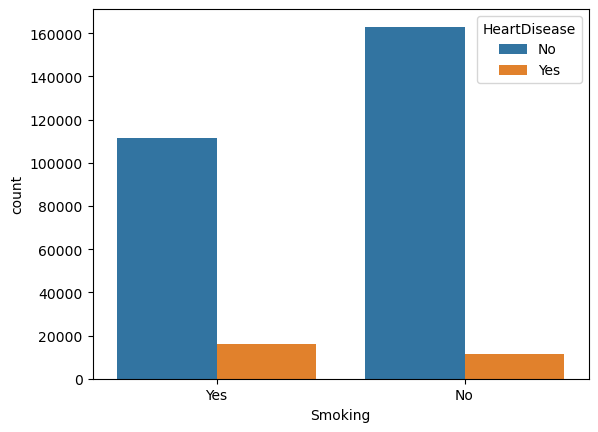

In [155]:
sns.countplot(x='Smoking',hue='HeartDisease',data=df)

# Data Preprocessing

In [156]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler


In [157]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'HeartDisease')
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split( 
                                            X,y,
                                            random_state=42, 
                                            test_size=0.2 ,
                                            stratify=y
                                        )


#Why split befour scaling/encoding
  - To avoid the data Leakage

In [158]:
from sklearn.preprocessing import StandardScaler ,OneHotEncoder

# Define categorical and numerical columns
df_cat = X_train.select_dtypes(include='object').columns.tolist()
df_num = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Ensure target is not in categorical feature list
if "HeartDisease" in df_cat:
    df_cat.remove("HeartDisease")

# Scale numeric columns
scaler = StandardScaler()
X_train[df_num] = scaler.fit_transform(X_train[df_num])
X_test[df_num] = scaler.transform(X_test[df_num])

# Drop categorical columns before encoding
# (Already handled in previous preprocessing, so skip this step)
X_train_nocat = X_train.copy()
X_test_nocat = X_test.copy()

# Encode categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Find categorical columns that are still present in X_train
cat_cols_to_encode = [col for col in df_cat if col in X_train.columns]

if cat_cols_to_encode:
    X_train_encoded = pd.DataFrame(
        encoder.fit_transform(X_train[cat_cols_to_encode]),
        columns=encoder.get_feature_names_out(cat_cols_to_encode),
        index=X_train.index
    )

    X_test_encoded = pd.DataFrame(
        encoder.transform(X_test[cat_cols_to_encode]),
        columns=encoder.get_feature_names_out(cat_cols_to_encode),
        index=X_test.index
    )
else:
    # If no categorical columns left to encode, create empty DataFrames
    X_train_encoded = pd.DataFrame(index=X_train.index)
    X_test_encoded = pd.DataFrame(index=X_test.index)

# Combine numeric and encoded categorical features
X_train = pd.concat([X_train_nocat, X_train_encoded], axis=1)
X_test = pd.concat([X_test_nocat, X_test_encoded], axis=1)



**Scale numeric Features**
 
  - Use StandardScaler Mean = 0, std = 1.

In [159]:
X_train.head(2)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
176113,0.474663,No,No,No,-0.439058,-0.137842,No,Female,50-54,White,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6984,-1.067105,No,No,No,-0.439058,-0.506526,No,Female,65-69,White,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Use only numeric columns for training
X_train_model = X_train.select_dtypes(include=[np.number])

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_model_imputed = imputer.fit_transform(X_train_model)

log_reg = LogisticRegression(max_iter=1000, random_state=42, n_jobs=10)
log_reg.fit(X_train_model_imputed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [161]:
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

ValueError: could not convert string to float: 'No'